In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [47]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_no_mean_CLASS.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV,CLASS
0,23.182777,0.000000,8.168021,0.00000,3.787637,0.000000,0.000000,0.00000,1.747140,0.00000,2.091629,0.00000,0.000000,0.0,0.0,0.0,entailment
1,22.942028,1.591551,2.134990,0.00000,0.000000,8.615627,0.000000,0.00000,6.468956,0.00000,1.410625,0.00000,0.000000,0.0,0.0,0.0,entailment
2,14.880619,1.824592,3.687874,0.00000,5.383794,0.000000,3.665578,0.00000,1.199861,0.00000,3.661071,0.00000,0.000000,0.0,0.0,0.0,contradiction
3,6.220228,0.000000,1.236711,0.00000,2.620311,0.000000,0.000000,0.00000,3.244059,0.00000,6.575240,0.00000,0.000000,0.0,0.0,0.0,contradiction
4,12.571067,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450579,0.00000,1.128580,0.00000,1.474608,0.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.506134,3.235250,0.000000,0.00000,0.000000,5.424360,0.000000,0.00000,1.057925,1.00428,2.870017,0.00000,0.000000,0.0,0.0,0.0,entailment
96,11.299096,0.000000,0.000000,0.00000,5.716955,0.000000,0.000000,0.00000,0.000000,0.00000,1.437577,0.00000,0.000000,0.0,0.0,0.0,entailment
97,5.297839,0.000000,5.138863,0.00000,0.000000,0.000000,0.000000,0.00000,1.224579,0.00000,4.193496,0.00000,0.000000,0.0,0.0,0.0,contradiction
98,7.110450,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450452,0.00000,1.492532,0.00000,0.000000,0.0,0.0,0.0,contradiction


In [48]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,VERB_VERB,VERB_ADV,ADV_NOUN,ADV_ADJ,ADV_VERB,ADV_ADV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.933630,1.420933,2.266566,0.487803,3.229856,1.398877,0.406870,0.277978,2.540163,0.193960,2.511021,0.217655,0.444092,0.055996,0.299592,0.121411
std,11.844145,2.745811,3.052742,1.744622,4.718448,3.249229,1.306758,1.370748,3.315508,0.646068,3.128407,0.917154,1.917748,0.374244,1.608045,0.879950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.934640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.463868,0.000000,1.342973,0.000000,1.779214,0.000000,0.000000,0.000000,1.592038,0.000000,1.589384,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.832999,2.225710,3.601139,0.000000,3.795642,0.000000,0.000000,0.000000,3.260690,0.000000,3.587492,0.000000,0.000000,0.000000,0.000000,0.000000
max,69.723298,15.646733,19.075915,11.812714,25.429739,17.176733,8.096021,10.670149,17.773756,5.053692,16.915806,7.196821,13.142446,3.442915,13.756932,7.558466


In [49]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


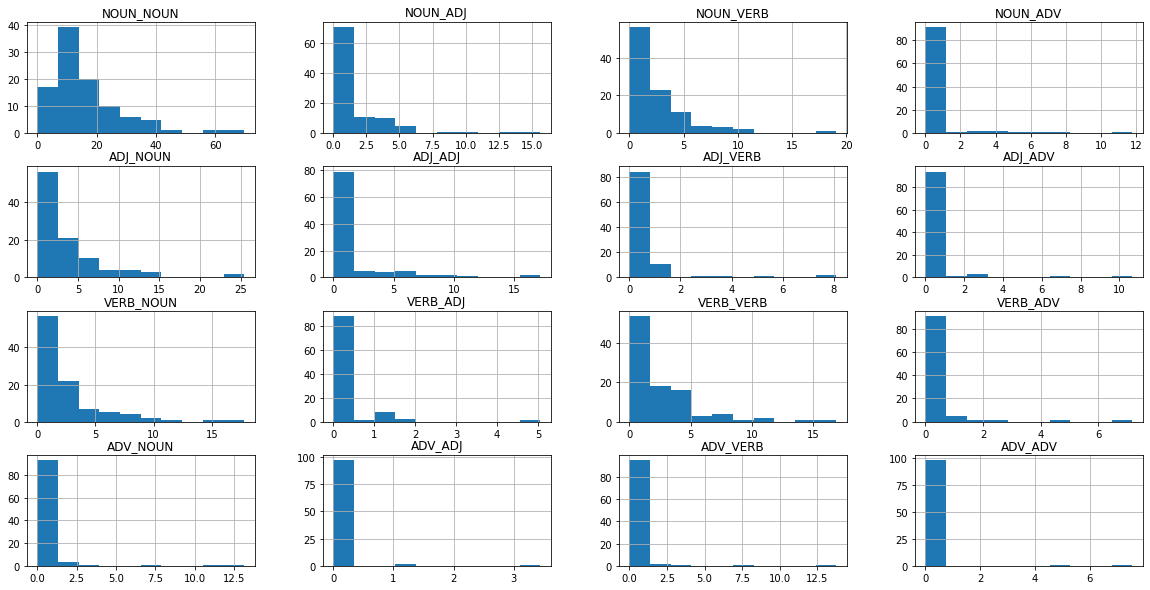

In [50]:
dataframe.hist(figsize=(20,10))
plt.show()

In [51]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [52]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [53]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_104756/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_104756/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 16)

In [54]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [55]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [56]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [57]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
model.decision_function(X)

array([[ 2.10596404e-01,  6.75581375e-01, -8.86177779e-01],
       [-1.35031669e+00,  1.14576088e+00,  2.04555810e-01],
       [-3.56639057e-01,  4.13998404e-01, -5.73593469e-02],
       [-2.04070560e-02,  1.97413380e-01, -1.77006324e-01],
       [-1.11994157e-01,  2.75107829e-01, -1.63113672e-01],
       [ 2.51153582e-01,  5.42614291e-01, -7.93767873e-01],
       [-3.12105123e-02,  1.96211220e-01, -1.65000707e-01],
       [-6.65088537e-01,  7.99006577e-01, -1.33918040e-01],
       [-2.60024153e-01, -5.43444200e-01,  8.03468353e-01],
       [ 1.66195955e-01,  3.41908648e-01, -5.08104602e-01],
       [-7.61464666e-01,  1.66163646e-01,  5.95301020e-01],
       [-7.31172075e-02,  2.76876872e-01, -2.03759665e-01],
       [-4.02394559e-01,  2.90114020e-01,  1.12280539e-01],
       [ 2.17093933e-01,  3.70680416e-01, -5.87774350e-01],
       [-3.33191540e-01, -2.46057154e-01,  5.79248693e-01],
       [-5.81649444e-02,  2.02248919e-01, -1.44083975e-01],
       [-1.12331884e+00,  1.69659147e+00

In [59]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [60]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [61]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [62]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  3 NOUN_ADV 5 ADJ_ADJ
Entailment  7 ADJ_ADV 1 NOUN_ADJ
Neutral  1 NOUN_ADJ 3 NOUN_ADV


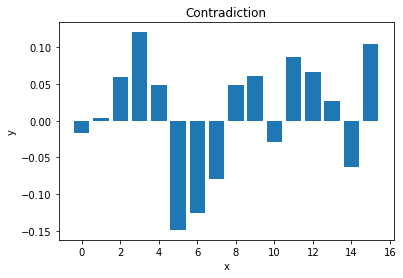

In [63]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,16,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

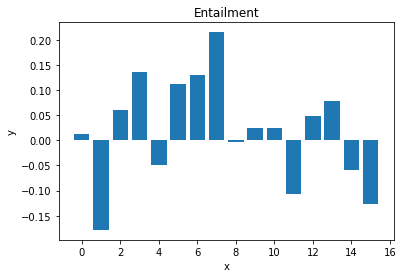

In [64]:
x_v = np.arange(0,16,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

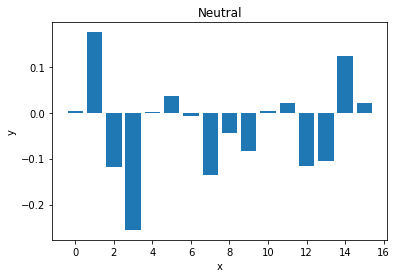

In [65]:
x_v = np.arange(0,16,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [66]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'contradiction' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'contradiction' 'entailment' 'entailment' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'neutral' 'neutral' 'entailment' 'entailment' 'entailment' 'entailme

In [67]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [68]:
X

array([[23.18277657,  0.        ,  8.16802084, ...,  0.        ,
         0.        ,  0.        ],
       [22.94202816,  1.59155118,  2.13499045, ...,  0.        ,
         0.        ,  0.        ],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.29783893,  0.        ,  5.13886273, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.11044979,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [12.45881259,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
model.score(X,y)

0.56

In [70]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.433333 (0.059835)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [72]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7


In [73]:
print(confusion_matrix(Y_validation, predictions))

[[0 1 1]
 [0 6 1]
 [0 0 1]]


In [74]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         2
   entailment       0.86      0.86      0.86         7
      neutral       0.33      1.00      0.50         1

     accuracy                           0.70        10
    macro avg       0.40      0.62      0.45        10
 weighted avg       0.63      0.70      0.65        10



/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#X_new = pd.DataFrame()
#model.predict(X_new)